In [9]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/hair-type-dataset/data/dreadlocks/image233.jpg
/kaggle/input/hair-type-dataset/data/dreadlocks/images141.jpg
/kaggle/input/hair-type-dataset/data/dreadlocks/fb8bbfb130a3ec23982a5a3a31b8f9a5.jpg
/kaggle/input/hair-type-dataset/data/dreadlocks/image106.jpg
/kaggle/input/hair-type-dataset/data/dreadlocks/image27.jpg
/kaggle/input/hair-type-dataset/data/dreadlocks/images69.jpg
/kaggle/input/hair-type-dataset/data/dreadlocks/image109.jpg
/kaggle/input/hair-type-dataset/data/dreadlocks/19-long-hair-locs-with-square-parting-CEDQMZjJnZV.jpg
/kaggle/input/hair-type-dataset/data/dreadlocks/image2.jpg
/kaggle/input/hair-type-dataset/data/dreadlocks/image115.jpg
/kaggle/input/hair-type-dataset/data/dreadlocks/image47.jpg
/kaggle/input/hair-type-dataset/data/dreadlocks/image300.jpg
/kaggle/input/hair-type-dataset/data/dreadlocks/image245.jpg
/kaggle/input/hair-type-dataset/data/dreadlocks/image297.jpg
/kaggle/input/hair-type-dataset/data/dreadlocks/1200px-Man_with_dreadlocks.jpg
/kagg

# Dataset used:
- https://www.kaggle.com/datasets/kavyasreeb/hair-type-dataset


In [1]:
import torchvision
import torch
import fastai.vision.all as fv
dataset_path = '/kaggle/input/hair-type-dataset/'

In [44]:
label = lambda x: str(x).split("/")[5]
from pathlib import Path

dls=fv.ImageDataLoaders.from_path_func(Path((dataset_path)),
                                       fv.get_image_files(dataset_path + '/data/'),
                                       label, item_tfms=fv.Resize(300))
    

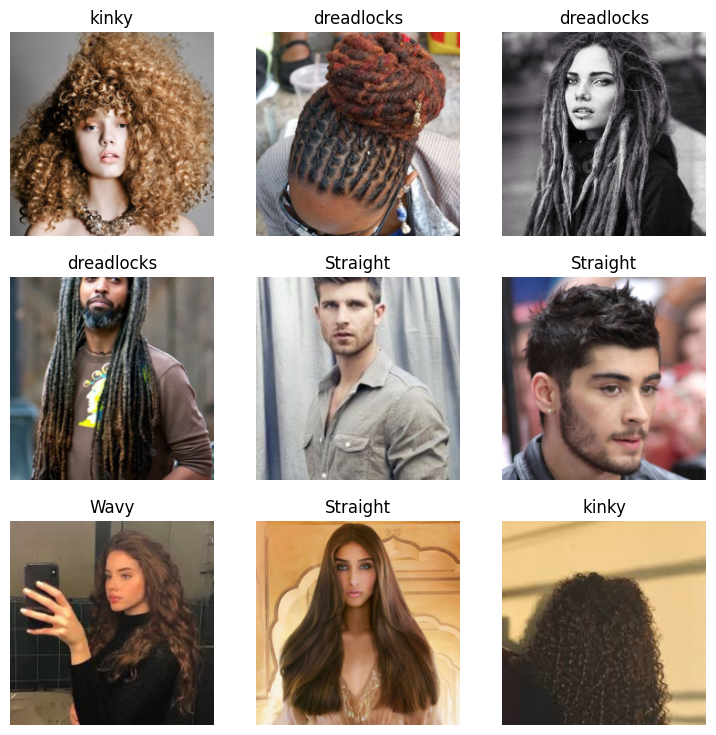

In [39]:
dls.show_batch()

# Testing
My tests indicate that using higher resolutions is more effective than finetuning more times. Also, using resnet18 or 34 doesnt make a big difference. The results are quite satisfying! It usually misses only when the hair types are hard to classify.

In [47]:
learn = fv.vision_learner(dls, fv.resnet18, metrics=fv.error_rate)
learn.fine_tune(2)

epoch,train_loss,valid_loss,error_rate,time
0,1.633406,0.463402,0.176322,00:14


epoch,train_loss,valid_loss,error_rate,time
0,0.536462,0.308374,0.098237,00:15
1,0.352958,0.283525,0.103275,00:14


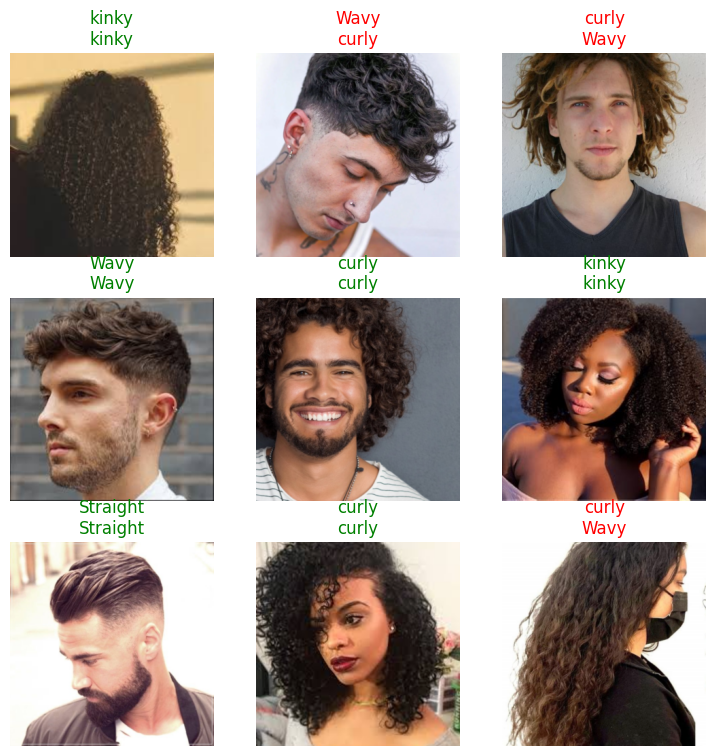

In [49]:
learn.show_results()

This shows how easily and quickly we can classify images using the fastai framework. It's truly a bliss